In [5]:
from datasets import load_dataset

wildbench_data = load_dataset('WildVision/wildvision-bench', "vision_bench_0617", split='test')




Generating test split: 100%|██████████| 500/500 [00:03<00:00, 128.78 examples/s]


Instruction: What ecg pathology is in


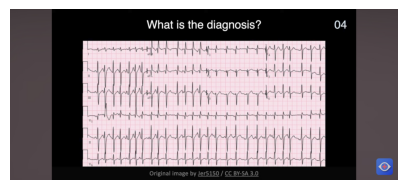

In [25]:

from PIL import Image
import matplotlib.pyplot as plt

i = 7
sample = wildbench_data[i]

# Display the image
plt.figure(figsize=(5, 5))
print(f"Instruction: {sample['instruction']}")
plt.imshow(sample['image'])
plt.axis('off')
plt.show()



In [19]:
instructions = []
for i in range(len(wildbench_data)): 
    instructions.append(wildbench_data[i]["instruction"])

In [20]:
print(instructions)

['What is this?', 'What is this?', 'What is this?', 'How many workers are working in the construction site? Are all of them wearing the safety equipments? If no, who are not wearing them?', 'As Rusty pulls on the toy, what is the direction of the opposing force?', 'What do you see?', 'Where is this person likely to be living?', 'What ecg pathology is in', 'If I am in the group, what kind of emotion will I show?', 'Edit in 3d model', 'give him a name', 'What is this flower? Photographed in Japan in the spring.', 'how many vials are in this image?\n', 'Create a new word by removing one letter from this image.', 'what is this flower? This photo was taken in the garden in spring.', 'What is this?', 'How many displays can you see? List them in a bulleted list', 'What keyboard is that?', 'What will happen in a few seconds?', 'How many chairs are in this pic?', 'How many of this dices are green?', 'Where this pic was taken?', 'explain everything in this screenshot', 'list only the non-text ic

In [21]:
import csv 
with open('instructions_500.csv', 'w', newline='') as file: 
    writer = csv.writer(file) 
    writer.writerow(instructions)

In [ ]:
# just manually go through and pick the first 50 images that look good 

# maybe go through with Nomic Atlas and topic classify the instructions?

## Analyze the results:

In [2]:
from rich.text import Text

def rich_output(text_tokens, trajectories):
    text_tokens = text_tokens
    trajectories = trajectories.tolist()
    rich_output = color_tokens(text_tokens, trajectories)
    return rich_output

def color_tokens(tokens, trajectory):
    """Colors tokens based on which model generated them"""
    colors = {
        0: "bright_cyan",    # Target model (first tokens)
        1: "bright_magenta",     # Draft model (accepted)
        2: "bright_yellow"          # Draft model (rejected)
    }
    
    text = Text()

    for token, model_idx in zip(tokens, trajectory):
        color = colors.get(model_idx, "white")  # Default to white if index not found
        text.append(token, style=color)  # No additional space
    return text


Instruction: what is the important conclusion that the red circle with no countries in it trying to show?
Generated text: ['The red circle in the graph is highlighting a specific area that shows a significant gap between electricity consumption and income per capita. This suggests that there are countries with high electricity consumption but low income per capita, which might indicate that these countries are using a lot of energy but not generating enough income to support their energy needs. This could be due to various factors, such as inefficient energy use, high energy costs, or a lack of economic diversification. The red circle is likely emphasizing the need for these countries to address their energy consumption patterns and economic challenges to achieve sustainable development.\n']


The red circle in the graph is highlighting a specific area that shows a significant gap between electricity 
consumption and income per capita. This suggests that there are countries with high electricity consumption but low
income per capita, which might indicate that these countries are using a lot of energy but not generating enough 
income to support their energy needs. This could be due to various factors, such as inefficient energy use, high 
energy costs, or a lack of economic diversification. The red circle is likely emphasizing the need for these 
countries to address their energy consumption patterns and economic challenges to achieve sustainable development.

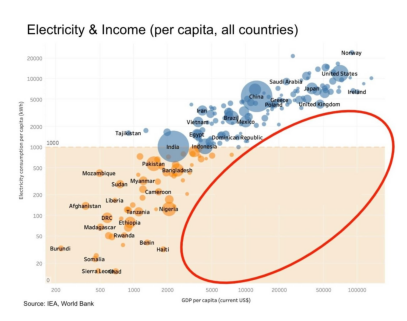

In [21]:
import pandas as pd
import io
from rich import print as rprint
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_parquet("generation_results_draftvlm.parquet")

i = 308
sample = df.iloc[i]

# Display the image
plt.figure(figsize=(5, 5))
print(f"Instruction: {sample['instruction']}")
print(f"Generated text: {sample['output_text']}")
rprint(rich_output(sample['generated_tokens'], sample['trajectory']))
# Convert bytes to PIL Image and display
image = Image.open(io.BytesIO(sample['image']))
plt.imshow(image)
plt.axis('off')
plt.show()